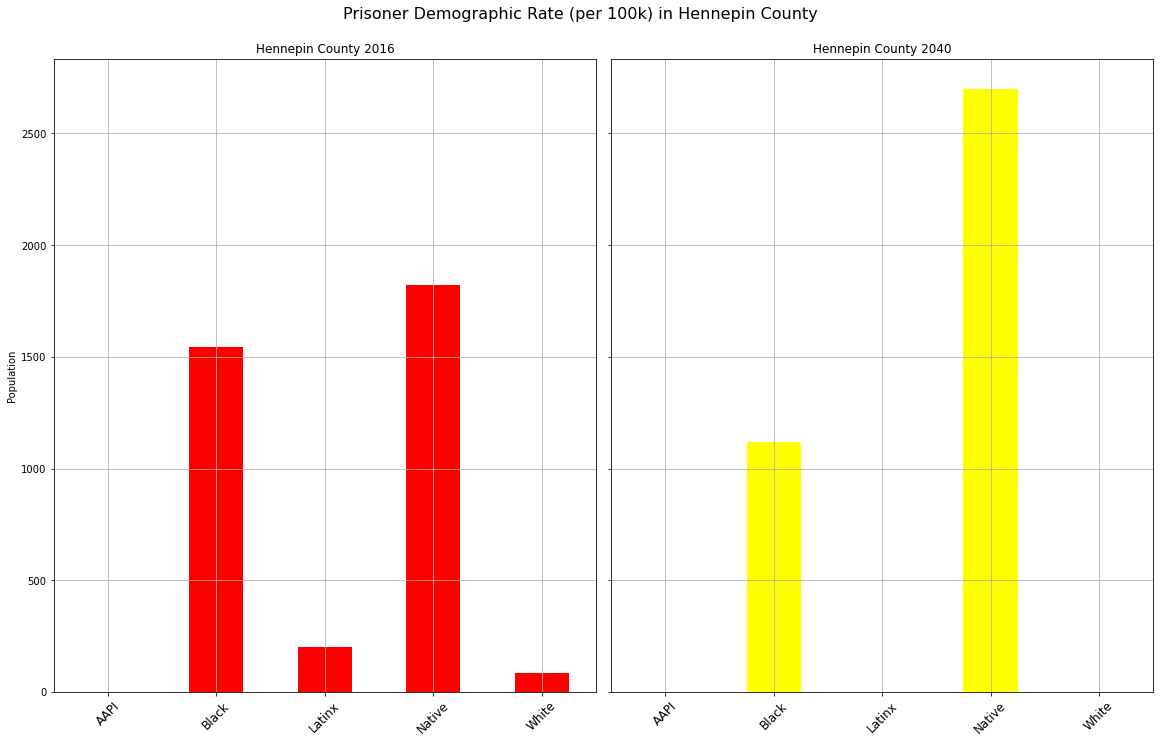

In [15]:
# Import libraries
from tools.model_generator import *
from tools.visual_runner import *
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.backends.backend_agg import FigureCanvasAgg
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.model_selection import train_test_split
import pickle

year = 2040

hb_pred, hb_score = generate_hen_blk_model(year)
hn_pred, hn_score = generate_hen_nat_model(year)

model_year = year
hen_blk = hb_pred
hen_nat = hn_pred

# Make a dataframe holding incarceration trends in the US from 1970 to 2018
inc_tre_df = pd.read_csv("/Users/matt/Desktop/naacp/data/incarceration_trends.csv", parse_dates=['year'],
                         index_col=False)

# Use numpy to fill missing values with zero
inc_tre_df = inc_tre_df.replace(np.nan, 0)

# Separate the original csv import into the counties we need data from
hennepin_df = inc_tre_df[(inc_tre_df['county_name'] == 'Hennepin County') & (inc_tre_df['state'] == 'MN')]
ramsey_df = inc_tre_df[(inc_tre_df['county_name'] == 'Ramsey County') & (inc_tre_df['state'] == 'MN')]
dakota_df = inc_tre_df[(inc_tre_df['county_name'] == 'Dakota County') & (inc_tre_df['state'] == 'MN')]
anoka_df = inc_tre_df[(inc_tre_df['county_name'] == 'Anoka County') & (inc_tre_df['state'] == 'MN')]

# Filter out the needed variables
relevant_variables = ['year', 'county_name',
                      'total_pop',
                      'total_prison_pop',
                      'female_prison_pop',
                      'male_prison_pop',
                      'aapi_prison_pop',
                      'black_prison_pop',
                      'latinx_prison_pop',
                      'native_prison_pop',
                      'other_race_prison_pop',
                      'white_prison_pop',
                      'aapi_female_prison_pop',
                      'aapi_male_prison_pop',
                      'black_female_prison_pop',
                      'black_male_prison_pop',
                      'latinx_female_prison_pop',
                      'latinx_male_prison_pop',
                      'native_female_prison_pop',
                      'native_male_prison_pop',
                      'other_race_female_prison_pop',
                      'other_race_male_prison_pop',
                      'white_female_prison_pop',
                      'white_male_prison_pop',
                      'total_prison_pop_rate',
                      'female_prison_pop_rate',
                      'male_prison_pop_rate',
                      'aapi_prison_pop_rate',
                      'black_prison_pop_rate',
                      'latinx_prison_pop_rate',
                      'native_prison_pop_rate',
                      'white_prison_pop_rate',
                      'total_prison_adm_rate',
                      'female_prison_adm_rate',
                      'male_prison_adm_rate',
                      'aapi_prison_adm_rate',
                      'black_prison_adm_rate',
                      'latinx_prison_adm_rate',
                      'native_prison_adm_rate',
                      'white_prison_adm_rate']

# Create a list of columns that should be dropped from the dataframe to create a pie chart focused dataframe
col_list = ['county_name', 'total_pop', 'total_prison_pop',
            'female_prison_pop', 'male_prison_pop', 'latinx_female_prison_pop',
            'latinx_male_prison_pop', 'native_female_prison_pop',
            'native_male_prison_pop', 'other_race_female_prison_pop',
            'other_race_male_prison_pop', 'white_female_prison_pop',
            'white_male_prison_pop', 'total_prison_pop_rate',
            'female_prison_pop_rate', 'male_prison_pop_rate', 'total_prison_adm_rate',
            'female_prison_adm_rate', 'male_prison_adm_rate',
            'aapi_prison_adm_rate', 'black_prison_adm_rate',
            'latinx_prison_adm_rate', 'native_prison_adm_rate',
            'white_prison_adm_rate', 'aapi_female_prison_pop',
            'aapi_male_prison_pop', 'black_female_prison_pop',
            'black_male_prison_pop']

# Clean up data to reduce unneeded data points
hennepin_df = hennepin_df[relevant_variables]
ramsey_df = ramsey_df[relevant_variables]
dakota_df = dakota_df[relevant_variables]
anoka_df = anoka_df[relevant_variables]

# Reset index to year to properly concatenate the series into a new dataframe named all_prison_pop_df
hennepin_df.year = hennepin_df['year'].dt.year
hennepin_df.index = hennepin_df.year

# reset the indexes
ramsey_df.year = ramsey_df['year'].dt.year
ramsey_df = ramsey_df.set_index('year')

anoka_df.year = anoka_df['year'].dt.year
anoka_df = anoka_df.set_index('year')

dakota_df.year = dakota_df['year'].dt.year
dakota_df = dakota_df.set_index('year')


# def run_visual_five(hen_blk, hen_nat, model_year=2017):
""" Activates a script that shows the male vs. female population data visualization. """
# Prepare dataframe subsets into new dataframe that holds democraphic populations and rates by county
# Create a list of columns that should be dropped from the dataframe to create a pie chart focused dataframe
col_list = ['county_name', 'total_pop', 'total_prison_pop',
            'female_prison_pop', 'male_prison_pop', 'latinx_female_prison_pop',
            'latinx_male_prison_pop', 'native_female_prison_pop',
            'native_male_prison_pop', 'other_race_female_prison_pop',
            'other_race_male_prison_pop', 'white_female_prison_pop',
            'white_male_prison_pop', 'total_prison_pop_rate',
            'female_prison_pop_rate', 'male_prison_pop_rate', 'total_prison_adm_rate',
            'female_prison_adm_rate', 'male_prison_adm_rate',
            'aapi_prison_adm_rate', 'black_prison_adm_rate',
            'latinx_prison_adm_rate', 'native_prison_adm_rate',
            'white_prison_adm_rate', 'aapi_female_prison_pop',
            'aapi_male_prison_pop', 'black_female_prison_pop',
            'black_male_prison_pop']

rate_drop_labels = ['aapi_prison_pop', 'black_prison_pop', 'latinx_prison_pop', 'native_prison_pop', 'other_race_prison_pop', 'white_prison_pop']

rate_demo_labels = pd.Series(["AAPI", "Black", "Latinx", "Native", "White"])

rate_demo_labels = rate_demo_labels.values.T

# Drop the columns that are unneeded
hen_dem_c_df = hennepin_df.drop(col_list, axis=1)
# Keep the row (year 2016) that is needed
hen_dem_c_df = hen_dem_c_df.iloc[-3:-2,:]

hen_dem_c_df = hen_dem_c_df.drop(rate_drop_labels, axis=1)
hen_dem_c_df = hen_dem_c_df.iloc[0:, 1:6].T

hen_model_df = hen_dem_c_df.copy()
hen_model_df[model_year] = [0, hen_blk, 0, hen_nat, 0]
hen_model_df.drop(columns=hen_model_df.columns[0], axis=1, inplace=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 10), constrained_layout = True, sharey=True)
fig.suptitle("Prisoner Demographic Rate (per 100k) in Hennepin County", fontsize=16, va='bottom')

# Plot the bar graphs, relating each curated dataframe to their respective axes to plot a 2x2 graph
hen_dem_c_df.plot.bar(grid=True, color='red', ax=ax1)
hen_model_df.plot.bar(grid=True, color='yellow', ax=ax2)

model_year = str(model_year)
# Set the titles of the subplots on their related axis variables
ax1.set_title('Hennepin County 2016'), ax2.set_title('Hennepin County ' + model_year)

# Apply these property changes to ALL ax objects
for ax in fig.get_axes():
    # ax.label_outer()
    ax.set_ylabel('Population')
    ax.get_legend().remove()
    ax.set_xticklabels(rate_demo_labels, fontsize=12, rotation = 45)

#     # Return the plot because we want to encapsulate the script in a function for ease of use
#     return plt
#
# hb_pred, hb_score = generate_hen_blk_model(year)
# hn_pred, hn_score = generate_hen_nat_model(year)
#
# print("Year: " + str(year) + " Hennepin County Black population rate prediction " + str(hb_pred) + " Score: " + str(hb_score))
# print("Year: " + str(year) + " Hennepin County Native population rate prediction " + str(hn_pred) + " Score: " + str(hn_score))
#
# run_visual_five(hb_pred, hn_pred, year).plot();
plt.plot();